In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

from src.simpleEDMD import *
import src.dictionary_strategy as d_strategy

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.set_printoptions(suppress=True,precision=4)

# Analytical Solution

In [ ]:
def analytical_koopman_eigenfunction(x,y,i,j):
    return np.power((x-y)/np.sqrt(2),i)*np.power(y,j)

def analytical_koopman_eigenvalue(i,j):
    return np.power(0.9,i)*np.power(0.8,j)


In [ ]:
x1 = np.arange(-5, 5.1, 0.1)
x2 = np.arange(-5, 5.1, 0.1)
xx1, xx2 = np.meshgrid(x1, x2)

In [ ]:
fig, axs = plt.subplots(2, 4,figsize=(36,15))
ij = [[1,0],[2,0],[0,1],[3,0],[1,1],[4,0],[2,1],[0,2]] #normalized to [-1,1]
for index, power in enumerate(ij):
    
    i = power[0]
    j = power[1]

    z = analytical_koopman_eigenfunction(xx1,xx2,i,j)
   
    temp = z.flatten()
    inf_norm = np.linalg.norm(temp, np.inf)
    normalized_z = np.array( [v/inf_norm for v in z])

    if index < 4:
        ax = axs[0,index]
    else:
        ax = axs[1,index-4]
    
    c = ax.pcolor(x1, x2, normalized_z, cmap='jet', vmin=-1, vmax=1)
    ax.set_title('$\mu = (0.9)^{}(0.8)^{}$'.format(i,j))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    fig.colorbar(c, ax=ax)


# Data generation
for example4.1.1

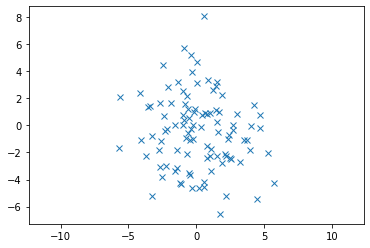

In [4]:
#generate X as 100 normally distributed initial conditions 2x100
mean = [0, 0]
cov = [[5, 0], [0, 5]]
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x1, x2, 'x')
plt.axis('equal')
plt.show()

X = []
for i in range(0,100):
    X.append([x1[i],x2[i]])
X = np.array(X)

In [5]:
#generate true Y by multiplying J
J = np.array([[0.9, -0.1],[0, 0.8]])
Y = []
for i in range(0,100):
    xi = X[i]
    yi = J@xi
    Y.append(yi)

Y = np.array(Y)

# EDMD for linear example

In [45]:
herimite_strategy = d_strategy.Herimite_strategy()
linearEDMD = simpleEDMD(X,Y, herimite_strategy)

In [46]:
linearEDMD.compute_koopman_operator()

In [16]:
K = linearEDMD.koopman_matrix

## Koopman Eigenvalues

In [17]:
Mu = linearEDMD.koopman_eigenvalues
Mu # correctly responding to eigenvalues in Fig.3

array([1.    +0.j    , 0.9   +0.j    , 0.81  +0.j    , 0.8   +0.j    ,
       0.729 +0.j    , 0.72  +0.j    , 0.6561+0.j    , 0.648 +0.j    ,
       0.64  +0.j    , 0.5832+0.j    , 0.5817+0.0704j, 0.5817-0.0704j,
       0.576 +0.j    , 0.5184+0.j    , 0.512 +0.j    , 0.4608+0.j    ,
       0.4177+0.1489j, 0.4177-0.1489j, 0.4096+0.j    , 0.4032+0.0449j,
       0.4032-0.0449j, 0.3796+0.2081j, 0.3796-0.2081j, 0.3137+0.j    ,
       0.1936+0.j    ])

## Koopman Eigenfunctions

In [12]:
Xi = linearEDMD.right_eigenvectors
Xi.shape

(25, 25)

In [44]:
ex1 = np.arange(-5, 5.1, 0.1)
ex2 = np.arange(-5, 5.1, 0.1)
#xx1, xx2 = np.meshgrid(x1, x2)


eX = []

for x1 in ex1:
    for x2 in ex2:
        
        eX.append([x1,x2])
print(eX)

[[-5.0, -5.0], [-5.0, -4.9], [-5.0, -4.800000000000001], [-5.0, -4.700000000000001], [-5.0, -4.600000000000001], [-5.0, -4.500000000000002], [-5.0, -4.400000000000002], [-5.0, -4.3000000000000025], [-5.0, -4.200000000000003], [-5.0, -4.100000000000003], [-5.0, -4.0000000000000036], [-5.0, -3.900000000000004], [-5.0, -3.8000000000000043], [-5.0, -3.7000000000000046], [-5.0, -3.600000000000005], [-5.0, -3.5000000000000053], [-5.0, -3.4000000000000057], [-5.0, -3.300000000000006], [-5.0, -3.2000000000000064], [-5.0, -3.1000000000000068], [-5.0, -3.000000000000007], [-5.0, -2.9000000000000075], [-5.0, -2.800000000000008], [-5.0, -2.700000000000008], [-5.0, -2.6000000000000085], [-5.0, -2.500000000000009], [-5.0, -2.4000000000000092], [-5.0, -2.3000000000000096], [-5.0, -2.20000000000001], [-5.0, -2.1000000000000103], [-5.0, -2.0000000000000107], [-5.0, -1.900000000000011], [-5.0, -1.8000000000000114], [-5.0, -1.7000000000000117], [-5.0, -1.600000000000012], [-5.0, -1.5000000000000124], [-5

In [43]:
#plot for 2nd eigenvalue = 0.9 
#corresponding to analytical solution i = 2, j = 0
mu = np.round(Mu[1].real,4)



Psi = linearEDMD.dictionary_Hermite_poly(eX)
ez = Psi@Xi[:,1].real
print(ez.shape)

eZ = Psi@Xi.real
print(eZ.shape)

(10201,)
(10201, 25)


In [ ]:
temp = ez.flatten()
inf_norm = np.linalg.norm(temp, np.inf)
normalized_ez = np.array( [v/inf_norm for v in ez])

fig, ax = plt.subplots(1, 1,figsize=(10,10))

c = ax.pcolor(ex1, ex2, normalized_ez, cmap='jet', vmin=-1, vmax=1)
ax.set_title('$\mu = {}$'.format(mu))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.colorbar(c, ax=ax)

## Koopman Modes

In [22]:
Wstar = linearEDMD.left_eigenvectors
w = linearEDMD.levecs

print('Unscaled 2nd left eigenvector: ' , w[:,1])
print('Scaled 2nd left eigenvector: ' , Wstar[:,1])
print('w_2@xi_2 = 1 : ', Wstar[:,24]@Xi[:,24])

Unscaled 2nd left eigenvector:  [-0.    +0.j -0.012 +0.j -0.    +0.j -0.0034+0.j -0.    +0.j -0.    +0.j
 -0.    +0.j -0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    -0.j
 -0.    +0.j -0.    +0.j  0.    +0.j  0.    +0.j  0.    -0.j  0.    +0.j
 -0.    +0.j  0.    -0.j  0.    +0.j -0.    -0.j -0.    +0.j -0.    +0.j
 -0.    +0.j]
Scaled 2nd left eigenvector:  [ -0.    +0.j  -1.4142-0.j   0.    +0.j   2.1213+0.j  -0.    +0.j
   0.    -0.j  -0.    +0.j   0.    -0.j  -0.    +0.j   1.4205+0.j
   0.    +0.j   0.7071+0.j  -0.    +0.j  -2.6872+0.j  -7.9979-0.j
  -0.    +0.j  -0.    -0.j   3.0154+0.j  12.8984-0.j  30.1457+0.j
   0.    -0.j -10.2883-0.j -29.9556-0.j -64.154 -0.j -86.7091-0.j]
w_2@xi_2 = 1 :  (1+1.6358300322939582e-17j)
